In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)

### 1.    Reading in Temer's CSV

In [3]:
# Reading file
temer_df = pd.read_csv('temer-votes.csv',header=None)

In [4]:
# Renaming columns
temer_df.columns = ['name','party','speech','vote']

In [5]:
# Extracting the state
temer_df['state'] = temer_df['party'].str.extract(r'-(\w\w)\.\)')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [6]:
# Extracting the party
temer_df['party'] = temer_df['party'].str.extract(r'\((\w+)-\w\w\.\)')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [7]:
# Reordering
temer_df = temer_df[['name','party','state','speech','vote']]

In [8]:
# Since there is some dirt after reading in the texts from the PDFs, I'll do some .strip()ing
temer_df['vote'] = temer_df['vote'].str.strip()
temer_df['speech'] = temer_df['speech'].str.strip()
temer_df['name'] = temer_df['name'].str.strip()

In [9]:
# All set!
temer_df['vote'].value_counts()

YES           266
NO            226
ABSTENTION      3
Name: vote, dtype: int64

In [10]:
temer_df

,name,party,state,speech,vote
0,ABEL MESQUITA JR.,DEM,RR,"Sr. Presidente, Sras. e Srs. Deputados, pe...",YES
1,CARLOS ANDRADE,PHS,RR,"Sr. Presidente, Sras. e Srs. Deputados, eu...",NO
2,EDIO LOPES,PR,RR,"Sr. Presidente, o Deputado Edio Lopes vota fav...",YES
3,HIRAN GONÇALVES,PP,RR,"Sr. Presidente, com muita serenidade e conv...",YES
4,JHONATAN DE JESUS,PRB,RR,"Sr. Presidente, Sras. e Srs. Deputados, eu...",YES
5,MARIA HELENA,PSB,RR,"Sr. Presidente, eu não sou a favor da impunida...",YES
6,REMÍDIO MONAI,PR,RR,"Sr. Presidente, pela estabilidade política e e...",YES
7,AFONSO HAMM,PP,RS,"Presidente, com convicção, com responsabili...",NO
8,AFONSO MOTTA,PDT,RS,Voto “não” ao parecer. Investigar é preci...,NO
9,ALCEU MOREIRA,PMDB,RS,Por absoluta falta de provas numa uma acu...,YES


In [11]:
#temer_df.to_csv('temer-tabela.csv',sep='|',index=False)

### 2.    Reading in Dilma's .xlsx file

In [12]:
# READING IN
dilma_df = pd.read_excel('impaechment-votes.xlsx')

In [13]:
# Renaming
dilma_df.columns = ['name','party','state','vote','gender','speech']

In [14]:
# Some filtering
dilma_df = dilma_df[['name','party','state','speech','vote']] 

In [15]:
# There is some dirt here as well, and I want the names in english as the other ones. Time to do some .str.replace~!
# First, stripping.
dilma_df['speech']    = dilma_df['speech'].str.strip()
dilma_df['vote']    = dilma_df['vote'].str.strip()
dilma_df['vote']    = dilma_df['vote'].str.upper() # Making everything uppercase to group some inconsistencies together
dilma_df['name']    = dilma_df['name'].str.strip()
dilma_df['party']    = dilma_df['party'].str.strip()

In [16]:
# Now, translating
dilma_df['vote'] = dilma_df['vote'].str.replace("SIM","YES")
dilma_df['vote'] = dilma_df['vote'].str.replace("NÃO","NO")
dilma_df['vote'] = dilma_df['vote'].str.replace("ABSTENÇÃO","ABSTENTION")

In [17]:
# Finally, there are two 'AUSENTE' representatives - they were not in the House that day, but the author of the spreadsheet counted then in anyway.
# Let's get rid of them.
dilma_df = dilma_df[dilma_df['vote'] != 'AUSENTE']

In [18]:
dilma_df['vote'].value_counts()

YES           367
NO            137
ABSTENTION      7
Name: vote, dtype: int64

### 3. Standardization
The two votes were similar in substance: representatives were deciding if the president should or should not be investigated for presumed crimes. Nevertheless, the questions were formulated differently in each ocasion. 

In Dilma's impeachment, congressmen were asked if they wanted her to be investigated - so, a 'yes' answer was a **PRO-REMOVAL** position. 

In the recent Temer investigation vote, the question was different: congressmen should vote if they agreed or not with a report made by the House's justice comission. This report said that there was no substance in the accusation against the president. So, a 'yes' vote was a position **AGAINST THE REMOVAL**.

In order to compare the different votes, I'll standardize the answers. If a congressmen wanted to remove the president from office, the vote is **'PRO-REMOVAL'**. If they wanted to keep the president in office, the vote is **'AGAINST REMOVAL'**.

In [19]:
# In Temer's vote, YES becomes AGAINST REMOVAL and NO becomes PRO-REMOVAL
temer_df['vote'] = temer_df['vote'].replace('YES','AGAINST REMOVAL')
temer_df['vote'] = temer_df['vote'].replace('NO','PRO-REMOVAL')

In [20]:
# In Dilmas vote, NO becomes AGAINST REMOVAL and YES becomes PRO-REMOVAL
dilma_df['vote'] = dilma_df['vote'].replace('NO','AGAINST REMOVAL')
dilma_df['vote'] = dilma_df['vote'].replace('YES','PRO-REMOVAL')

### 4. Merging
I can create an identifying column and merge both databases to make the analysis easier.

In [21]:
# Creating identifying column
dilma_df['case'] = 'Dilma'
temer_df['case'] = 'Temer'

In [22]:
# Concatenating
df = pd.concat([dilma_df,temer_df],ignore_index=True)

In [23]:
df.head()

,name,party,state,speech,vote,case
0,Abel Mesquita Jr,DEM,RR,"Roraima, verás que o filho teu não foge à luta...",PRO-REMOVAL,Dilma
1,Carlos Andrade,PHS,RR,"Sr. Presidente, esta não é uma história de ric...",PRO-REMOVAL,Dilma
2,Édio Lopes,PR,RR,"Sr. Presidente, o meu voto é contra o prossegu...",AGAINST REMOVAL,Dilma
3,Hiran Gonçalves,PP,RR,"Sr. Presidente, meu querido Brasil, pela minha...",PRO-REMOVAL,Dilma
4,Jhonatan de Jesus,PRB,RR,"Sr. Presidente, nem a favor do PMDB nem a favo...",PRO-REMOVAL,Dilma


### 5. Analysis
Empirically, I believe that votes against Dilma were longer and angrier - both her defender and oppositors were vocal and aggresive. In the other hand, in the Temer case, they were shorter and more neutral - specially from his defenders. I want to check that.

#### 5.1 Length
This one is straightforward: measure the length of each vote and see how it looks like.

In [24]:
# Creating a field with the length of each vote
df['length'] = df['speech'].str.len()
dilma_df['length'] = dilma_df['speech'].str.len()
temer_df['length'] = temer_df['speech'].str.len()

In [25]:
dilma_df['length'].describe()

count     511.000000
mean      314.810176
std       193.547525
min        12.000000
25%       180.000000
50%       263.000000
75%       405.000000
max      1079.000000
Name: length, dtype: float64

In [26]:
temer_df['length'].describe()

count    496.000000
mean     190.316532
std      131.409771
min        6.000000
25%       80.000000
50%      176.000000
75%      265.250000
max      745.000000
Name: length, dtype: float64

Yeah, Temer votes were considerably longer. But was it because of their defenders or because of the oppositors?


In [27]:
temer_df[temer_df.vote == 'AGAINST REMOVAL']['length'].describe()

count    266.000000
mean     162.011278
std      128.270277
min        6.000000
25%       56.000000
50%      126.000000
75%      234.000000
max      550.000000
Name: length, dtype: float64

In [28]:
temer_df[temer_df.vote == 'PRO-REMOVAL']['length'].describe()

count    226.000000
mean     224.451327
std      126.294892
min       14.000000
25%      141.750000
50%      209.500000
75%      294.000000
max      745.000000
Name: length, dtype: float64

And what about Dilma's    vote?

In [29]:
dilma_df[dilma_df.vote == 'PRO-REMOVAL']['length'].describe()

count     367.000000
mean      306.354223
std       185.939969
min        12.000000
25%       177.000000
50%       252.000000
75%       390.000000
max      1079.000000
Name: length, dtype: float64

In [30]:
dilma_df[dilma_df.vote == 'AGAINST REMOVAL']['length'].describe()

count     137.000000
mean      340.708029
std       214.353376
min        24.000000
25%       194.000000
50%       300.000000
75%       432.000000
max      1011.000000
Name: length, dtype: float64

In [302]:
temer_df

,name,party,state,speech,vote,case,length
0,ABEL MESQUITA JR.,DEM,RR,"Sr. Presidente, Sras. e Srs. Deputados, pe...",AGAINST REMOVAL,Temer,114
1,CARLOS ANDRADE,PHS,RR,"Sr. Presidente, Sras. e Srs. Deputados, eu...",PRO-REMOVAL,Temer,58
2,EDIO LOPES,PR,RR,"Sr. Presidente, o Deputado Edio Lopes vota fav...",AGAINST REMOVAL,Temer,121
3,HIRAN GONÇALVES,PP,RR,"Sr. Presidente, com muita serenidade e conv...",AGAINST REMOVAL,Temer,289
4,JHONATAN DE JESUS,PRB,RR,"Sr. Presidente, Sras. e Srs. Deputados, eu...",AGAINST REMOVAL,Temer,99
5,MARIA HELENA,PSB,RR,"Sr. Presidente, eu não sou a favor da impunida...",AGAINST REMOVAL,Temer,219
6,REMÍDIO MONAI,PR,RR,"Sr. Presidente, pela estabilidade política e e...",AGAINST REMOVAL,Temer,99
7,AFONSO HAMM,PP,RS,"Presidente, com convicção, com responsabili...",PRO-REMOVAL,Temer,172
8,AFONSO MOTTA,PDT,RS,Voto “não” ao parecer. Investigar é preci...,PRO-REMOVAL,Temer,74
9,ALCEU MOREIRA,PMDB,RS,Por absoluta falta de provas numa uma acu...,AGAINST REMOVAL,Temer,142


Interesting: when Dilma's impeachment was being discussed, her defender would make longer speeches. The same did not happen with Temer, whose defenders prefered shorter statements.

#### 5.2 Sentiments
Here things start getting more complicated. I will use the LIWC Portuguese Dictionary, avaliable [here](http://143.107.183.175:21380/portlex/index.php/pt/projetos/liwc).

It has a very big corpus and measures 64 emotions/categories related to the words. I manually made it into a format similar to the [english EmotionLexicon](http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm). See the [diary](diary.md) for more information about this!

#I am interested in words that express anger, that are related to family and religion.

In [31]:
# Reading in the LIWC
liwc = pd.read_csv('liwc_formatted.csv',encoding='Latin5')
liwc = liwc.drop_duplicates(subset='word',keep='last') 
# TO DO: Is there an inteligent way of determining which meaning of the duplicate words to use?
# I decided to keep the last one because of the word 'partido' (party), that could also mean 'broken' in portuguese.
# If I need to choose between them, I wanna keep the politics-related meaning.

In [32]:
# I will VECTORIZE each speech.
vec = TfidfVectorizer(vocabulary=liwc.word,
                      use_idf=False, 
                      norm='l1')
matrix = vec.fit_transform(df['speech'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,a,aba,abafa,abafad,abafada,abafadas,abafado,abafados,abafai,abafais,...,ótimo,ótimos,óvulo,óvulos,ônus,última,último,út,úteis,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# This will creat a Series for each emotion
angry_words = liwc[liwc.anger == 1]['word']
sad_words = liwc[liwc.sad == 1]['word']
religion_words = liwc[liwc.relig == 1]['word']
family_words = liwc[liwc.family == 1]['word']

In [34]:
# Now, I need to calculate the percentage of each emotion in the speech.
# This can be done by getting the sum of the percentages of all the words associated with a given emotion.
df['anger'] = wordcount_df[angry_words].sum(axis=1)*100
df['sadness'] = wordcount_df[sad_words].sum(axis=1)*100
df['religion'] = wordcount_df[religion_words].sum(axis=1)*100
df['family'] = wordcount_df[family_words].sum(axis=1)*100

In [35]:
df[df.case=='Dilma'].groupby('vote')['anger'].describe()

vote                  
ABSTENTION       count      7.000000
                 mean       0.000000
                 std        0.000000
                 min        0.000000
                 25%        0.000000
                 50%        0.000000
                 75%        0.000000
                 max        0.000000
AGAINST REMOVAL  count    137.000000
                 mean       1.333246
                 std        2.221766
                 min        0.000000
                 25%        0.000000
                 50%        0.000000
                 75%        2.272727
                 max        9.523810
PRO-REMOVAL      count    367.000000
                 mean       0.701956
                 std        1.510885
                 min        0.000000
                 25%        0.000000
                 50%        0.000000
                 75%        0.000000
                 max       10.869565
Name: anger, dtype: float64

In [36]:
df[df.case=='Temer'].groupby('vote')['anger'].mean()

vote
ABSTENTION         0.000000
AGAINST REMOVAL    0.422890
PRO-REMOVAL        0.894207
Name: anger, dtype: float64

In [277]:
df['speech'].describe()

count                            1007
unique                            977
top       Voto “sim”, Sr. Presidente.
freq                               11
Name: speech, dtype: object

### 6. Visualizing it

#### 6.1 Length of votes, in each case

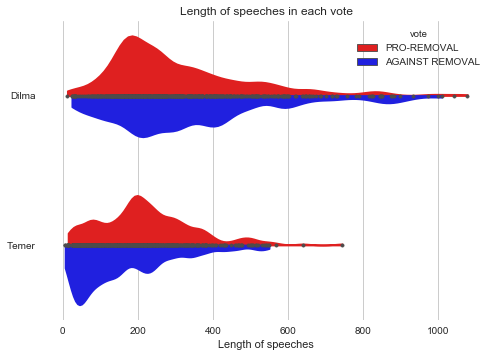

In [301]:
ax = plt.gca()
sns.despine(left=True, bottom=True)
sns.set(style="whitegrid")
sns.violinplot(y="case", 
                   x="length",
                   hue='vote',
                   data=df[(df.vote != 'ABSTENTION')],
                   split=True,
                   legend=False,
                   inner='point',
                   scale_hue = True,
                   palette = {'AGAINST REMOVAL': 'blue','PRO-REMOVAL':'red'},
                   bw=.150,
                   cut=0,
                   ax=ax)
ax.set_title('Length of speeches in each vote')
ax.set(ylabel='',xlabel='Length of speeches')
plt.savefig('violin_length_both.svg',transparent=True)

#### 6.2 Anger of votes, overall

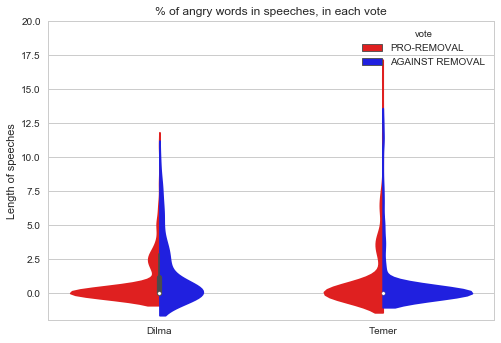

In [38]:
sns.despine(left=True, bottom=True)
sns.set(style="whitegrid")
g = sns.violinplot(x="case", 
                   y="anger",
                   hue='vote',
                   data=df[(df.vote != 'ABSTENTION')],
                   split=True,
                   legend=False,
                   palette = {'AGAINST REMOVAL': 'blue','PRO-REMOVAL':'red'})
g.set_title('% of angry words in speeches, in each vote')
g.set(ylim=(-2,20),xlabel= '',ylabel='Length of speeches')
plt.savefig('violin_length_both.svg',transparent=True)

### 6.3 Party breakdown by anger

**I NEED TO STRUCTURE MY DATA THIS WAY:**

`party,anger-temer-overall|anger-temer-pro|anger-temer-against|anger-temer-abstention|anger-dilma-overall|anger-dilma-pro|anger-dilma-abstention|max_anger|`

**OR** two separate dataframes, one for Temer and one for Dilma.

In [39]:
# This dataframe is the overall anger per party, grouped by case and vote.
anger_df = df.groupby(['party','case','vote'])['anger'].mean().to_frame().reset_index()
# One party changed it's name during the period.
anger_df['party'].replace('PTN','PTN/PODE',inplace=True)
anger_df['party'].replace('PODE','PTN/PODE',inplace=True)

In [40]:
# This dataframe is the anger in speeches during Dilma's impeachment judgement, grouped by party and with type of vote as a columns
dilma_anger = anger_df[anger_df.case=='Dilma'].groupby(['party','vote']).mean().reset_index().pivot(index='party',columns='vote').reset_index()
dilma_anger.columns = dilma_anger.columns.droplevel()
dilma_anger.columns = ['party','abstention_anger_dilma','against_removal_anger_dilma','pro_removal_anger_dilma']
dilma_anger.head()

,party,abstention_anger_dilma,against_removal_anger_dilma,pro_removal_anger_dilma
0,DEM,NaN,NaN,0.510637
1,PCdoB,NaN,1.857394,NaN
2,PDT,0.0,0.836796,1.338839
3,PEN,NaN,0.000000,0.000000
4,PHS,NaN,1.694915,0.000000


In [41]:
# This dataframe is the anger in speeches during Temer's corruption charges, grouped by party and with type of vote as a columns
temer_anger = anger_df[anger_df.case=='Temer'].groupby(['party','vote']).mean().reset_index().pivot(index='party',columns='vote').reset_index()
temer_anger.columns = temer_anger.columns.droplevel()
temer_anger.columns = ['party','abstention_anger_temer','against_removal_anger_temer','pro_removal_anger_temer']
temer_anger.head()

,party,abstention_anger_temer,against_removal_anger_temer,pro_removal_anger_temer
0,DEM,0.0,0.212089,0.694444
1,PCdoB,NaN,NaN,1.852564
2,PDT,NaN,0.000000,1.110457
3,PEN,NaN,0.000000,NaN
4,PHS,NaN,0.000000,1.041667


In [42]:
# Now I will concatenate those two dataframes horizontally and have a single big one
merged_df = pd.merge(dilma_anger,temer_anger,on='party')
merged_df['order_by_max'] = df.max(axis=1)
merged_df.head()

,party,abstention_anger_dilma,against_removal_anger_dilma,pro_removal_anger_dilma,abstention_anger_temer,against_removal_anger_temer,pro_removal_anger_temer,order_by_max
0,DEM,NaN,NaN,0.510637,0.0,0.212089,0.694444,304.0
1,PCdoB,NaN,1.857394,NaN,NaN,NaN,1.852564,160.0
2,PDT,0.0,0.836796,1.338839,NaN,0.000000,1.110457,112.0
3,PEN,NaN,0.000000,0.000000,NaN,0.000000,NaN,250.0
4,PHS,NaN,1.694915,0.000000,NaN,0.000000,1.041667,190.0


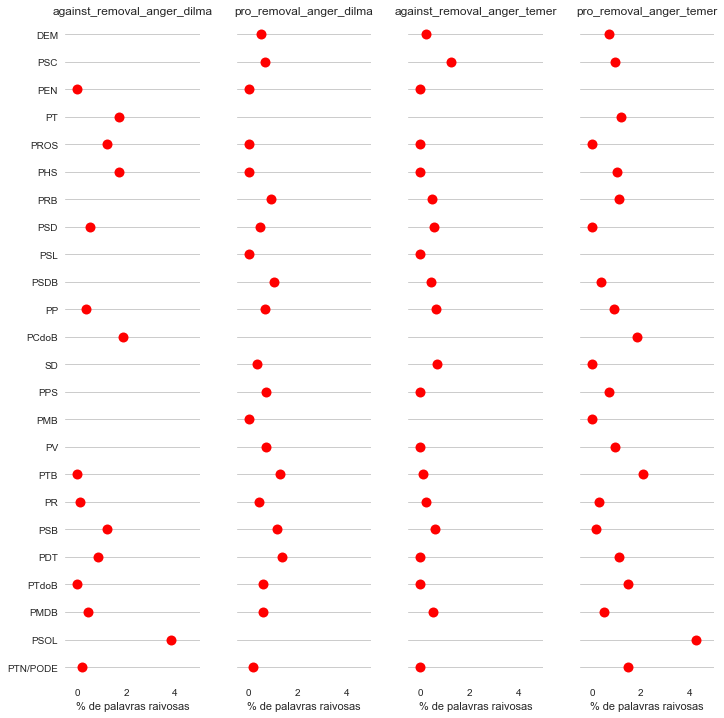

In [43]:
#### Plot by party and kind of vote (pro-removal, against-removal)
sns.set(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(merged_df.sort_values(by='order_by_max',ascending=False),
                 x_vars=merged_df.columns[[2,3,5,6,]], y_vars=["party"],
                 size=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",color='red',edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-0.5, 5), xlabel="% de palavras raivosas", ylabel="")

# Use semantically meaningful titles for the columns
titles = merged_df.columns[[2,3,5,6,]]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
#plt.savefig('cat_anger.svg',transparent=True)

In [44]:
# Making the data structure fit into the graphic. Lot's of transforming.
df_x = df.groupby(['party','vote','case'])['anger','length'].mean().reset_index()

In [45]:
# Converting type
df_x['length'] = df_x['length'].astype(float)

In [46]:
# This function will get a vote count
def get_total_votes(row):
    percentage_party = (df[(df.case==row['case']) & (df.vote==row['vote']) & (df.party==row['party'])]['vote'].count()) / (df[(df.case==row['case']) & (df.party==row['party'])]['vote'].count())
    total_votes = (df[(df.case==row['case']) & (df.vote==row['vote']) & (df.party==row['party'])]['vote'].count()) 
    return pd.Series({'total_votes':total_votes,'percentage_party':percentage_party})

In [47]:
# Running the function and assigning it to the former dataframe
df_try = df_x.apply(get_total_votes,axis=1)
df_x = df_x.join(df_try)

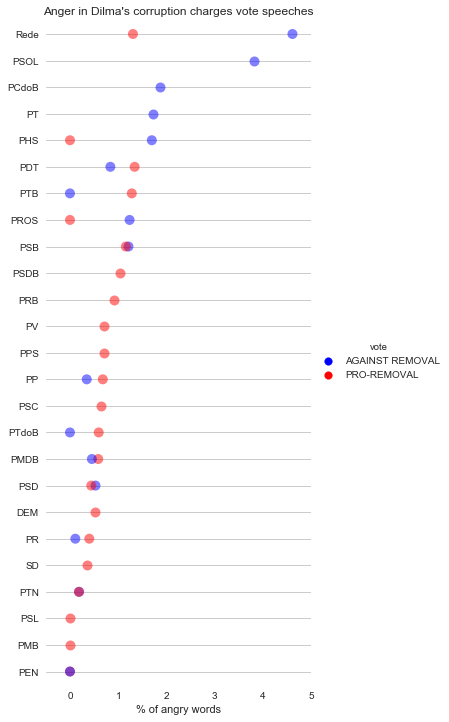

In [48]:
data_dilma=df_x[(df_x.case=='Dilma') & (df_x.vote != 'ABSTENTION')].sort_values(by='anger',ascending=False)
sns.set(style="whitegrid")
g = sns.factorplot(x="anger",
                   y="party",
                   hue="vote",
                   kind='strip',
                   orient='h',
                   alpha=0.5,
                   data=data_dilma,
                   size=10,
                   aspect=.50,
                   s=10,
                   palette = {'AGAINST REMOVAL': 'blue','PRO-REMOVAL':'red'},
                   legend=True)

g.set(xlim=(-0.5, 5), xlabel="% of angry words", ylabel="")

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title="Anger in Dilma's corruption charges vote speeches")

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.savefig('dilma_anger_party.svg',transparent=True)

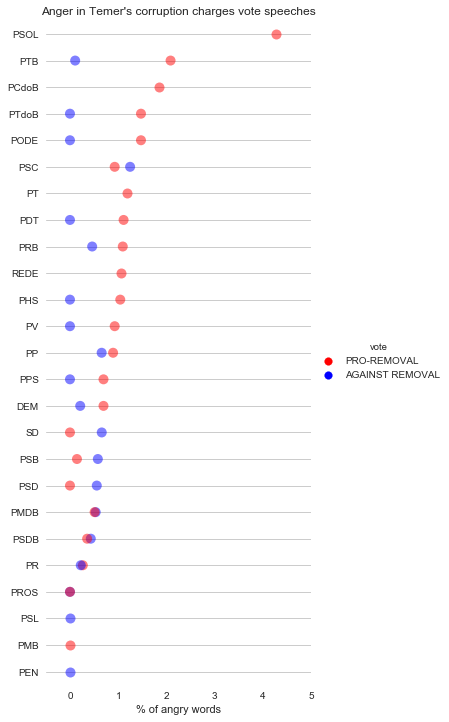

In [50]:
sns.set(style="whitegrid")
data_temer = df_x[(df_x.case=='Temer') & (df_x.vote != 'ABSTENTION')].sort_values(by='anger',ascending=False) 
g = sns.factorplot(x="anger",
                   y="party",
                   hue="vote",
                   kind='strip',
                   orient='h',
                   alpha=0.5,
                   data=data_temer,
                   size=10,
                   aspect=.50,
                   s=10,
                   palette = {'AGAINST REMOVAL': 'blue','PRO-REMOVAL':'red'},
                   legend=True)

g.set(xlim=(-0.5, 5), xlabel="% of angry words", ylabel="")

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title="Anger in Temer's corruption charges vote speeches")

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)

sns.despine(left=True, bottom=True)
plt.savefig('temer_anger_party.svg',transparent=True)

In [198]:
# SCATTER PLOTS
df['party'].replace('PTN','PTN/PODE',inplace=True)
df['party'].replace('PODE','PTN/PODE',inplace=True)
scatter_df_dilma = df[df.case=='Dilma'].groupby('party')['anger'].mean().to_frame().reset_index()
scatter_df_dilma  = scatter_df_dilma.merge(df[df.case=='Dilma'].groupby('party')['speech'].count().to_frame().reset_index(),on='party',how='left')
scatter_df_dilma.columns = ['party','anger_mean','total_votes']
scatter_df_dilma  = scatter_df_dilma.merge(df[(df.case=='Dilma')&(df.vote=='PRO-REMOVAL')].groupby('party')['speech'].count().to_frame().reset_index(),on='party',how='left')
scatter_df_dilma.columns = ['party','anger_mean','total_votes','pro_removal_votes']
scatter_df_dilma  = scatter_df_dilma.merge(df[(df.case=='Dilma')&(df.vote=='AGAINST REMOVAL')].groupby('party')['speech'].count().to_frame().reset_index(),on='party',how='left')
scatter_df_dilma.columns = ['party','anger_mean','total_votes','pro_removal_votes','against_removal_votes']
scatter_df_dilma  = scatter_df_dilma.merge(df[(df.case=='Dilma')&(df.vote=='ABSTENTION')].groupby('party')['speech'].count().to_frame().reset_index(),on='party',how='left')
scatter_df_dilma.columns = ['party','anger_mean','total_votes','pro_removal_votes','against_removal_votes','abstention_votes']
scatter_df_dilma.fillna(0,inplace=True)
scatter_df_dilma['pro_removal_%'] = (scatter_df_dilma['pro_removal_votes']/scatter_df_dilma['total_votes'])*100
scatter_df_dilma['against_removal_%'] = (scatter_df_dilma['against_removal_votes']/scatter_df_dilma['total_votes'])*100
scatter_df_dilma['abstention_%'] = (scatter_df_dilma['abstention_votes']/scatter_df_dilma['total_votes'])*100

In [257]:
# SCATTER PLOTS
df['party'].replace('PTN','PTN/PODE',inplace=True)
df['party'].replace('PODE','PTN/PODE',inplace=True)
scatter_df_temer = df[df.case=='Temer'].groupby('party')['anger'].mean().to_frame().reset_index()
scatter_df_temer  = scatter_df_temer.merge(df[df.case=='Temer'].groupby('party')['speech'].count().to_frame().reset_index(),on='party',how='left')
scatter_df_temer.columns = ['party','anger_mean','total_votes']
scatter_df_temer  = scatter_df_temer.merge(df[(df.case=='Temer')&(df.vote=='PRO-REMOVAL')].groupby('party')['speech'].count().to_frame().reset_index(),on='party',how='left')
scatter_df_temer.columns = ['party','anger_mean','total_votes','pro_removal_votes']
scatter_df_temer  = scatter_df_temer.merge(df[(df.case=='Temer')&(df.vote=='AGAINST REMOVAL')].groupby('party')['speech'].count().to_frame().reset_index(),on='party',how='left')
scatter_df_temer.columns = ['party','anger_mean','total_votes','pro_removal_votes','against_removal_votes']
scatter_df_temer  = scatter_df_temer.merge(df[(df.case=='Temer')&(df.vote=='ABSTENTION')].groupby('party')['speech'].count().to_frame().reset_index(),on='party',how='left')
scatter_df_temer.columns = ['party','anger_mean','total_votes','pro_removal_votes','against_removal_votes','abstention_votes']
scatter_df_temer.fillna(0,inplace=True)
scatter_df_temer['pro_removal_%'] = (scatter_df_temer['pro_removal_votes']/scatter_df_temer['total_votes'])*100
scatter_df_temer['against_removal_%'] = (scatter_df_temer['against_removal_votes']/scatter_df_temer['total_votes'])*100
scatter_df_temer['abstention_%'] = (scatter_df_temer['abstention_votes']/scatter_df_temer['total_votes'])*100

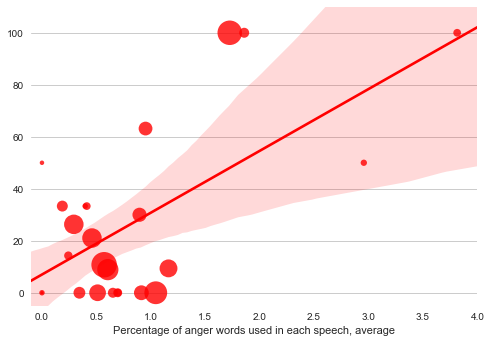

In [276]:
ax = plt.gca()
g = sns.regplot(data=scatter_df_dilma,x='anger_mean',y='against_removal_%',color='red',scatter_kws={"s":scatter_df_dilma['total_votes']*10})
g.set(xlim=(-0.1, 4), xlabel="Percentage of anger words used in each speech, average", ylim=(-5,110), ylabel="")
sns.despine(left=True, bottom=True)
ax.xaxis.grid(False)

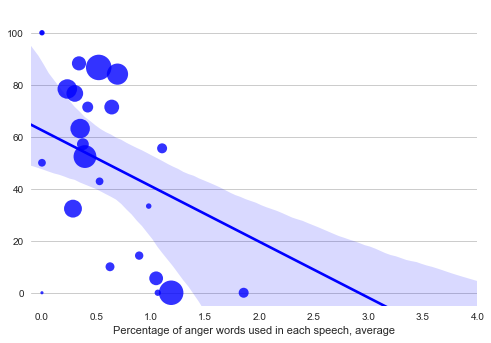

In [275]:
ax = plt.gca()
g = sns.regplot(data=scatter_df_temer,
                x='anger_mean',
                y='against_removal_%',
                color='blue',
                scatter_kws={"s":scatter_df_dilma['total_votes']*10},
                fit_reg=True)
g.set(xlim=(-0.1, 4), xlabel="Percentage of anger words used in each speech, average", ylim=(-5,110), ylabel="")
sns.despine(left=True, bottom=True)
#ax.invert_yaxis()
ax.xaxis.grid(False)

